In [4]:
using Distributions, PyPlot

### Goal: Find a smooth function that, unlike $L_2$, where $p_0$ matters.

In [68]:
srand(8675309)
N = 10
q = .8  #Service level
b = q/(1-q)
h = 1
p0 = 0
K = 1000

#Gen Pks uniformly over interval
ps = rand(K)

#xk = 1 iff phat > 1-q
#xk = 0 iff phat < 1-q

#Expected Obj at alpha
function obj_k(alpha, p, p0)
    dist = Binomial(N, p)
    #b * p * cdf(dist, (1-q - alpha * p0)/(1-alpha) * N) + h * (1-p) * (1-cdf(dist, (1-q - alpha * p0)/(1-alpha) * N))
    (b*p - h*(1-p)) * cdf(dist, (1-q - alpha * p0)/(1-alpha) * N) + h * (1-p)
end

function obj_k_norm(alpha, p, p0)
    dist = Normal(p*N, N * p * (1-p))
    (b*p - h*(1-p)) * cdf(dist, (1-q - alpha * p0)/(1-alpha) * N) + h * (1-p)
end

obj(alpha, ps, p0) = mean(map(p-> obj_k(alpha, p, p0), ps))
obj_norm(alpha, ps, p0) = mean(map(p-> obj_k_norm(alpha, p, p0), ps))

obj_norm (generic function with 1 method)

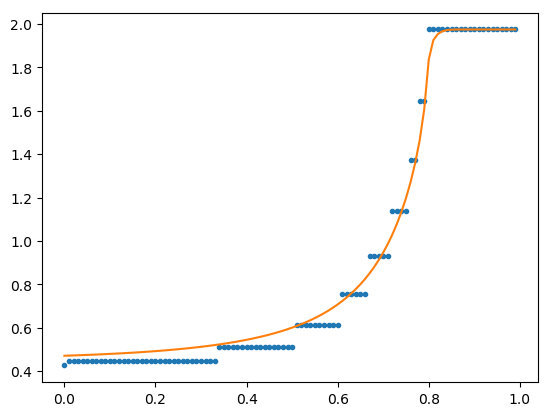

(0.0, 0.4262473232443404, 0.0)

In [69]:
alpha_grid = linspace(0, .99, 100)
out = map(a->obj(a, ps, p0), alpha_grid)
out2 = map(a->obj_norm(a, ps, p0), alpha_grid)

plot(alpha_grid, out, ".")
plot(alpha_grid, out2, "-")

alphaOR = alpha_grid[indmin(out)]
alphaOR, minimum(out), 1-minimum(out)/out[1]

In [ ]:
### Try a smoothed newsvendor function

## Examples To Study:

In [25]:
###  No benefits to shrinking at p0 = .5, 0, 1
# Suggests that normal approximation is not perfect
srand(8675309)
N = 10
q = .8  #Service level
b = q/(1-q)
h = 1
p0 = .5  #Also no benefits at p0 = 0, 1
K = 1000


1000